## Auction verification classifier

The dataset was created as part of a scientific study. The goal was to find out whether one could replace costly verification of complex process models (here: simultaneous multi-round auctions, as used for auctioning frequency spectra) with predictions of the outcome.

Features:
- __**process.b1.capacity**__: Capacity (max number of products to win) of Bidder 1.
- __**process.b2.capacity**__: Capacity (max number of products to win) of Bidder 2.
- __**process.b3.capacity**__: Capacity (max number of products to win) of Bidder 3.
- __**process.b4.capacity**__: Capacity (max number of products to win) of Bidder 4.
- __**property.price**__: Price currently verified.
- __**property.product**__: Product currently verified.
- __**property.winner**__: Bidder currently verified as winner of the product (0 if only price verified).
- __**property.winner**__: Bidder currently verified as winner of the product (0 if only price verified).

Targets:
- __**verification.result (Classification)**__: Binary verification result - is the verified outcome possible?
- __**verification.time (Regression)**__: Runtime of verification procedure.	

### Importing libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

### Data overview

In [3]:
data = pd.read_csv('data/data.csv')
data.head()

,process.b1.capacity,process.b2.capacity,process.b3.capacity,process.b4.capacity,property.price,property.product,property.winner,verification.result,verification.time
0,0,0,2,1,59,1,0,False,163.316667
1,0,0,2,1,59,2,0,False,200.860000
2,0,0,2,1,59,4,0,False,154.888889
3,0,0,2,1,59,6,0,False,108.640000
4,0,0,2,1,60,1,0,True,85.466667


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   process.b1.capacity  2043 non-null   int64  
 1   process.b2.capacity  2043 non-null   int64  
 2   process.b3.capacity  2043 non-null   int64  
 3   process.b4.capacity  2043 non-null   int64  
 4   property.price       2043 non-null   int64  
 5   property.product     2043 non-null   int64  
 6   property.winner      2043 non-null   int64  
 7   verification.result  2043 non-null   bool   
 8   verification.time    2043 non-null   float64
dtypes: bool(1), float64(1), int64(7)
memory usage: 129.8 KB


There are no missing values in the dataset

In [5]:
data.describe()

,process.b1.capacity,process.b2.capacity,process.b3.capacity,process.b4.capacity,property.price,property.product,property.winner,verification.time
count,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000
mean,1.000000,2.093979,1.883994,0.587861,71.473324,3.252080,0.455213,7336.944574
std,0.816696,0.811269,0.320310,0.492340,8.048740,1.804225,1.062828,10375.393650
min,0.000000,0.000000,1.000000,0.000000,59.000000,1.000000,0.000000,77.916667
25%,0.000000,1.000000,2.000000,0.000000,65.000000,2.000000,0.000000,546.818910
50%,1.000000,2.000000,2.000000,1.000000,70.000000,3.000000,0.000000,1316.983333
75%,2.000000,3.000000,2.000000,1.000000,78.000000,5.000000,0.000000,10876.638889
max,2.000000,3.000000,2.000000,1.000000,90.000000,6.000000,4.000000,44130.520833


From these statistics we can say that data has 5 categorical and one numerical variable.

In [11]:
data['property.price'] = data['property.price'].astype('float64')

I will solve a classification problem so I can drop one of the target variables.

In [17]:
data.drop(['verification.time'], axis=1, inplace=True)

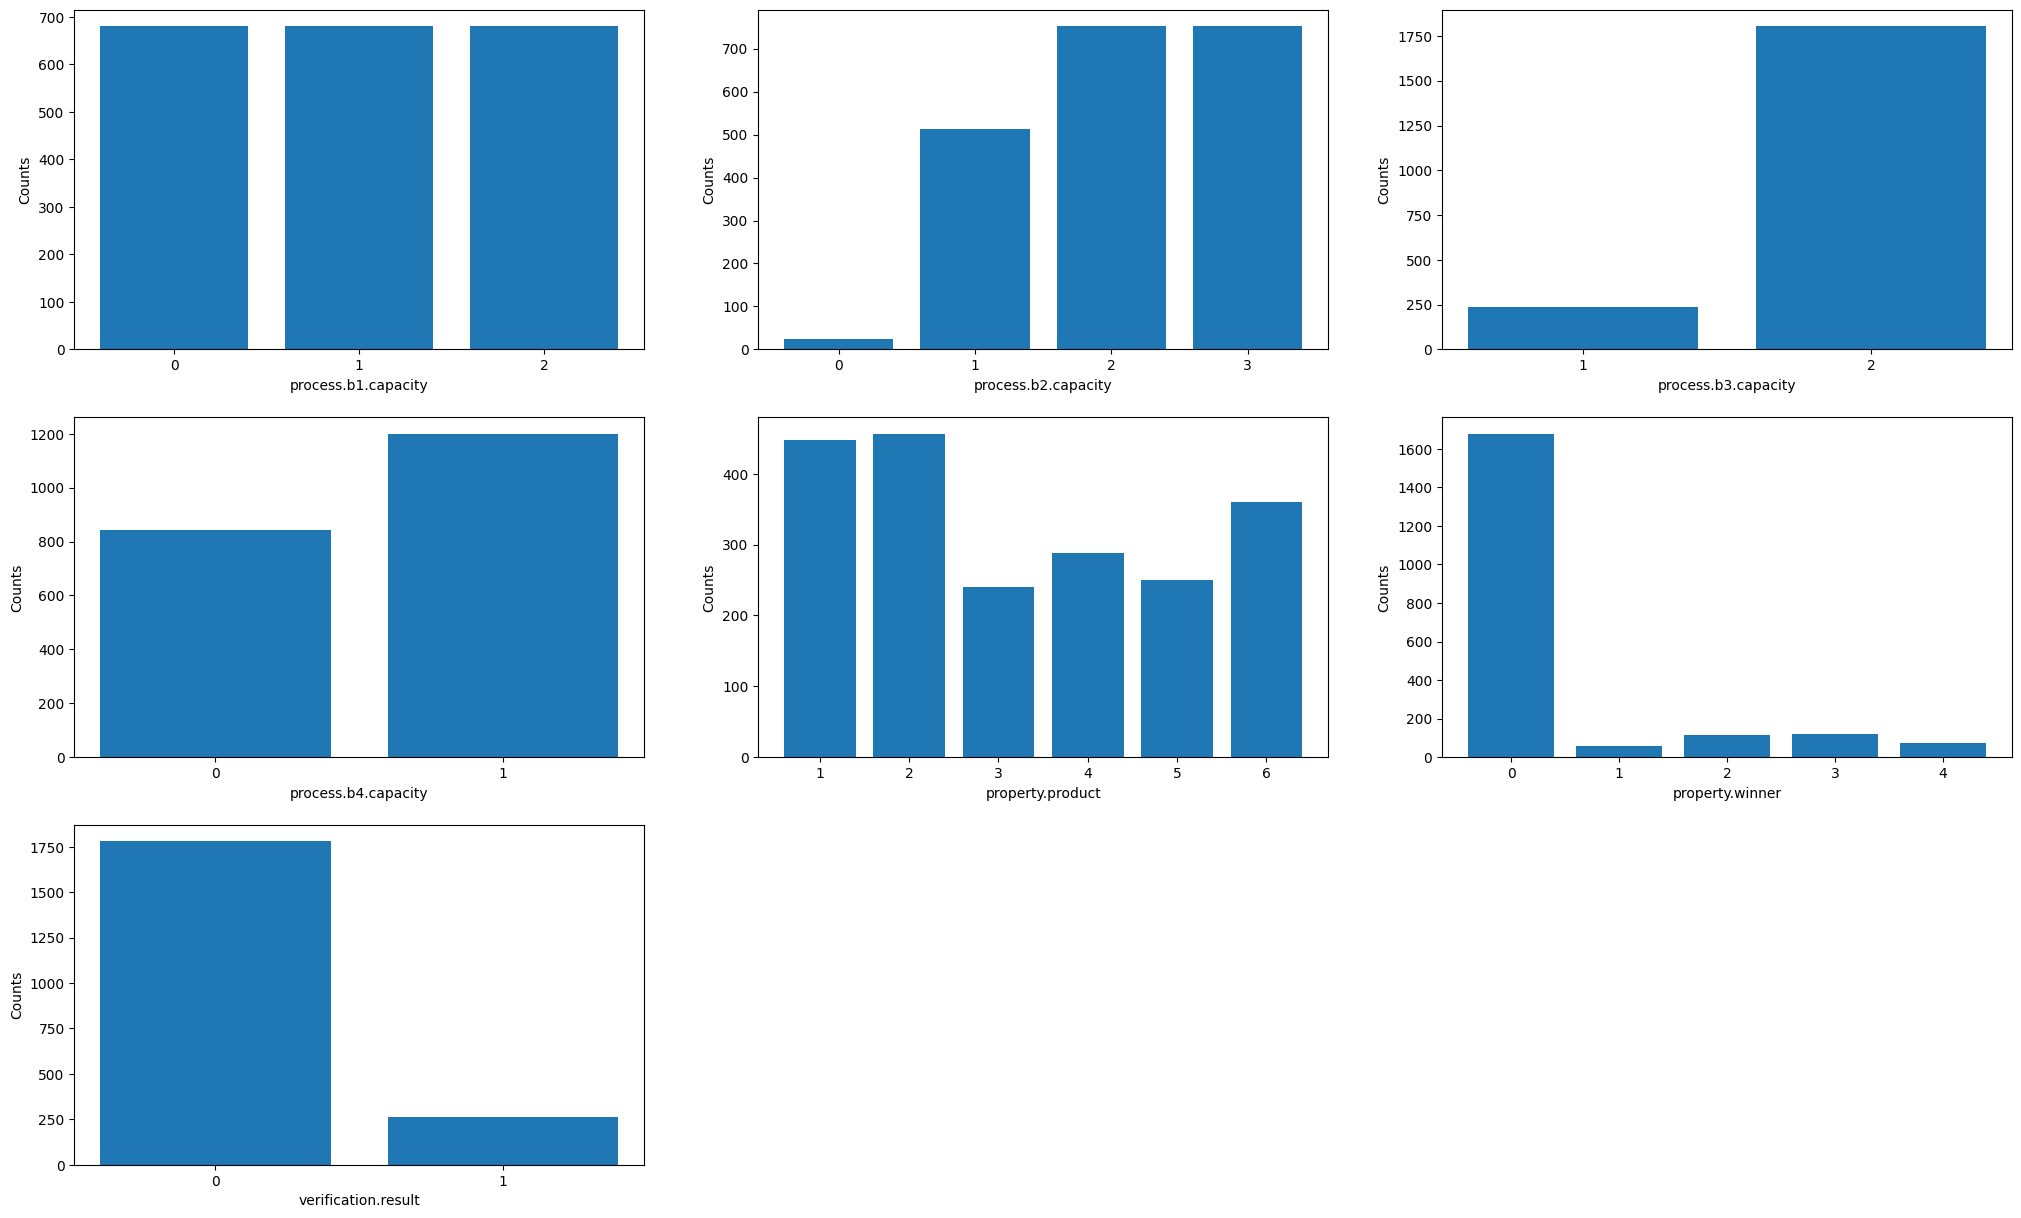

In [40]:
categorical_features = []
fig = plt.figure(figsize=(25, 15))
i = 1
for ft in data.columns:
    if not str(data[ft].dtype).startswith('float'):
        categorical_features.append(ft)
        
        plt.subplot(3, 3, i)
        plt.bar(data[ft].value_counts().index, data[ft].value_counts().values)
        plt.xticks(data[ft].value_counts().index)
        plt.xlabel(f'{ft}')
        plt.ylabel('Counts')
        i += 1
categorical_features.pop(-1)
plt.show()

From these graphs we can say that here we have an imbalanced dataset because it has many more outcomes where verification isn't possible and our target was set to 0.

Text(0.5, 0, 'property.price')

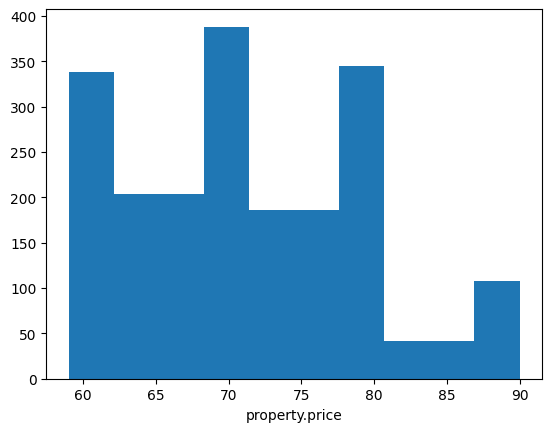

In [36]:
plt.hist(data['property.price'])
plt.xlabel('property.price')

### Feature engineering, one-hot encoder and Standart scaller

Since we have a lot of categorical features, let's encode them using one-hot encoder form sklearn.

In [50]:
encoded_data = pd.get_dummies(data, columns=categorical_features).astype('float32')

In [58]:
from sklearn.preprocessing import StandardScaler

encoded_data['property.price'] = StandardScaler().fit_transform(np.array(encoded_data['property.price']).reshape(-1, 1))

In [59]:
encoded_data.head()

,property.price,verification.result,process.b1.capacity_0,process.b1.capacity_1,process.b1.capacity_2,process.b2.capacity_0,process.b2.capacity_1,process.b2.capacity_2,process.b2.capacity_3,process.b3.capacity_1,...,property.product_2,property.product_3,property.product_4,property.product_5,property.product_6,property.winner_0,property.winner_1,property.winner_2,property.winner_3,property.winner_4
0,-1.550103,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-1.550103,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-1.550103,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,-1.550103,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,-1.425830,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Train, test and validation split

First let's separate our features and target variables.

In [62]:
X, y = encoded_data[[col for col in encoded_data.columns if col != 'verification.result']], encoded_data['verification.result']

In [86]:
from sklearn.model_selection import train_test_split

X_train_all, X_test, y_train_all, y_test = train_test_split(X, y, test_size=.2)

In [87]:
X_train, X_val, y_train, y_val = train_test_split(X_train_all, y_train_all, test_size=.2)

### Bagging

In [91]:
from sklearn.metrics import roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

baseline = RandomForestClassifier()
baseline.fit(X_train, y_train)

RandomForestClassifier()

In [92]:
y_pred = baseline.predict(X_val)
print(f'ROC AUC score: {roc_auc_score(y_val, y_pred)}')

ROC AUC score: 0.8450834879406308


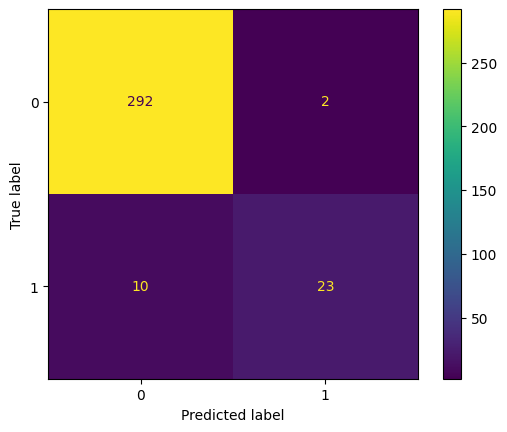

In [93]:
cm = confusion_matrix(y_val, y_pred)
ConfusionMatrixDisplay(cm).plot()

#### Tuning for bagging

In [94]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': [100, 150, 200, 250, 300],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [3, 5, 8, 10],
    'bootstrap': [True, False]
}

In [95]:
grid_cv = GridSearchCV(RandomForestClassifier(), parameters, scoring='roc_auc')
results = grid_cv.fit(X_train_all, y_train_all)

In [97]:
results.best_estimator_

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=10,
                       n_estimators=250)

In [98]:
results.best_score_

0.9944792495204533

In [99]:
random_forest_classifier = RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=10,
                       n_estimators=250)

### Boosting

In [104]:
import lightgbm as lgbm

baseline = lgbm.LGBMClassifier()
baseline.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 158, number of negative: 1149
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000163 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 75
[LightGBM] [Info] Number of data points in the train set: 1307, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.120888 -> initscore=-1.984052
[LightGBM] [Info] Start training from score -1.984052
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

LGBMClassifier()

In [105]:
y_pred = baseline.predict(X_val)
print(f'ROC AUC: {roc_auc_score(y_val, y_pred)}')

ROC AUC: 1.0


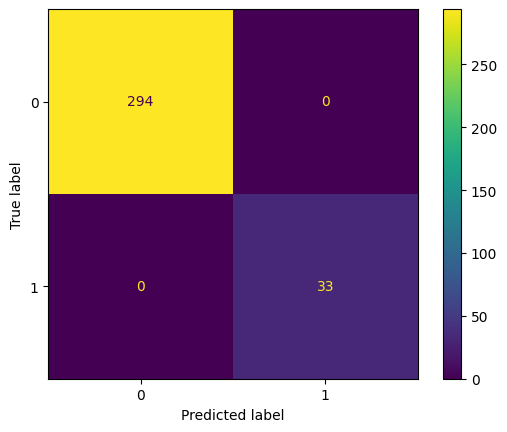

In [106]:
cm = confusion_matrix(y_val, y_pred)
ConfusionMatrixDisplay(cm).plot()

#### Tuning for boosting

In [ ]:
parameters = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [3, 5, 8, 10],
    'boosting_type': ['gbdt', 'dart'],
    'learning_rate': [0.1, 0.01, 0.001],
    'num_leaves': [10, 30, 50, 60]
}

grid_cv = GridSearchCV(lgbm.LGBMClassifier(), parameters, scoring='roc_auc')
results = grid_cv.fit(X_train_all, y_train_all)

In [109]:
results.best_params_

{'boosting_type': 'gbdt',
 'learning_rate': 0.1,
 'max_depth': 8,
 'n_estimators': 300,
 'num_leaves': 30}

In [110]:
results.best_score_

0.9995626049697485

In [111]:
lgbm_classifier = lgbm.LGBMClassifier(boosting_type='gbdt', learning_rate=0.1, max_depth=8, n_estimators=300, num_leaves=30)

### Stacking

In [118]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

estimators = [
    ('dtc', DecisionTreeClassifier()),
    ('svc', SVC()),
    ('lr', LogisticRegression())
]
baseline = StackingClassifier(estimators, final_estimator=RandomForestClassifier())
baseline.fit(X_train, y_train)

StackingClassifier(estimators=[('dtc', DecisionTreeClassifier()),
                               ('svc', SVC()), ('lr', LogisticRegression())],
                   final_estimator=RandomForestClassifier())

In [119]:
y_pred = baseline.predict(X_val)
print(f'ROC AUC: {roc_auc_score(y_val, y_pred)}')

ROC AUC: 0.9982993197278911


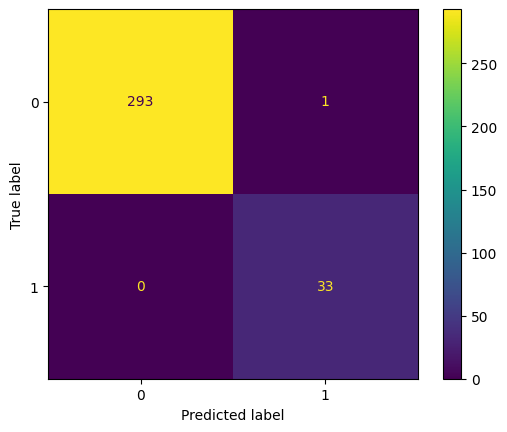

In [120]:
cm = confusion_matrix(y_val, y_pred)
ConfusionMatrixDisplay(cm).plot()

In [121]:
stk_classifier = StackingClassifier(estimators, final_estimator=RandomForestClassifier(n_estimators=250, max_depth=10))

### Comparing all models on the test data

In [ ]:
random_forest_classifier.fit(X_train_all, y_train_all)
lgbm_classifier.fit(X_train_all, y_train_all)
stk_classifier.fit(X_train_all, y_train_all)

ROC AUC for RandomForestClassifier: 0.8858446537211433
ROC AUC for LGBMClassifier: 0.9985207100591715
ROC AUC for StackingClassifier: 0.9773939494957913


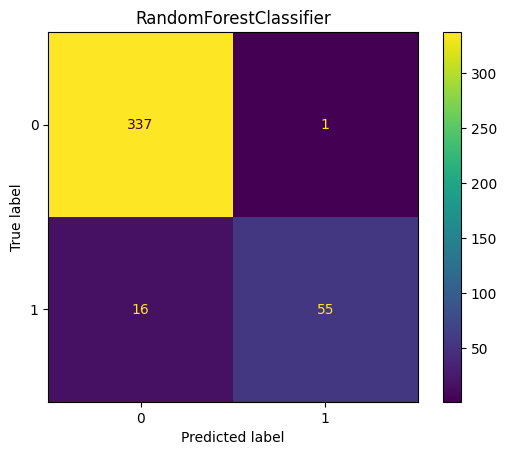

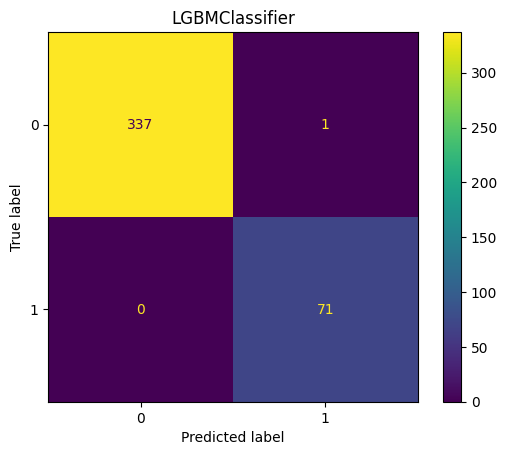

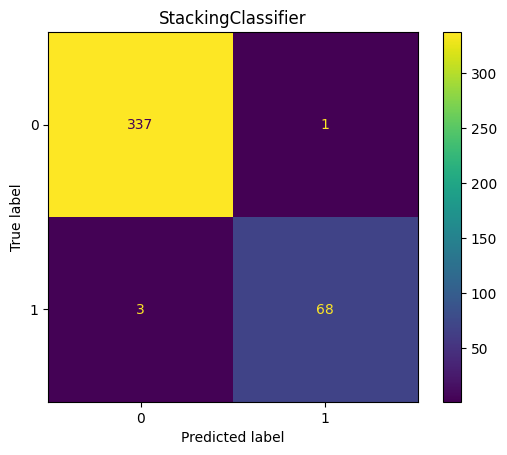

In [126]:
models = [random_forest_classifier, lgbm_classifier, stk_classifier]
for i, model in enumerate(models, start=1):
    y_pred = model.predict(X_test)
    print(f'ROC AUC for {type(model).__name__}: {roc_auc_score(y_test, y_pred)}')
    
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm).plot()
    plt.title(f'{type(model).__name__}')


### Conclusions
- This is an imbalanced classification problem because we have many more outcomes with 0.
- From this research we figured out that tuned LGBM classifier gives the best performance and we can use it to solve this problem. It has the highest ROC AUC score and the best confusion matrix correctly predicting almost all test samples.
- Random forest classifier sometimes can misclassify False outcomes that are actually True.
- Stacking classifier also gives a good performance with a little difference in the score but LGBM still better.